# Classification Models For Star Rating Predictions

In [1]:
#importing all the packages required
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
data = pd.read_excel(r"AC_Dataset_Cleaned.xlsx")

In [3]:
data = data.drop('Unnamed: 0',axis = 1)

In [4]:
data

,Brand,Model Name,Type,Capacity in Tons,Star Rating,Series,Cooling and Heating,Cooling Capacity,Compressor,Dehumidification,...,Power Consumption,Price,low Indoor Noise Level,high Indoor Noise Level,indoor W,indoor h,indoor d,outdoor W,outdoor h,outdoor d
0,Blue Star,3WAE081YDF,1,0.75,3,YD Series,No,2499.0,Rotary,Yes,...,840.0,19990,35,55,60.0,38.0,56.0,72.0,54.8,26.5
1,Blue Star,3WAE081YDF,1,0.75,3,YD Series,No,2499.0,Rotary,Yes,...,840.0,19990,35,55,60.0,38.0,56.0,72.0,54.8,26.5
2,Blue Star,FS312YBTU,0,1.00,3,No Series,No,3323.0,Rotary,Yes,...,741.0,32490,35,55,81.8,29.5,22.3,91.5,59.0,35.0
3,Blue Star,FS312YBTU,0,1.00,3,No Series,No,3323.0,Rotary,Yes,...,741.0,32490,35,55,105.5,29.9,21.5,88.0,63.8,31.0
4,Blue Star,FS312YBTU,0,1.00,3,No Series,No,3323.0,Rotary,Yes,...,741.0,32490,35,55,56.0,37.7,61.5,76.0,55.2,25.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,White Westing House,WWH123INA,0,1.00,3,No Series,No,3500.0,Rotary,Yes,...,1210.0,33999,9,35,87.6,19.4,29.8,73.0,54.5,28.5
663,White Westing House,WWH243INA,0,2.00,3,No Series,No,6300.0,Rotary,Yes,...,6300.0,54999,43,45,112.1,23.1,39.0,82.5,65.5,31.0
664,White Westing House,WWH243INA,0,2.00,3,No Series,No,6300.0,Rotary,Yes,...,6300.0,54999,43,45,112.1,23.1,39.0,82.5,65.5,31.0
665,White Westing House,WWH243INA,0,2.00,3,No Series,No,6300.0,Rotary,Yes,...,6300.0,54999,43,45,112.1,23.1,39.0,82.5,65.5,31.0


In [5]:
#info. data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         667 non-null    object 
 1   Model Name                    667 non-null    object 
 2   Type                          667 non-null    int64  
 3   Capacity in Tons              667 non-null    float64
 4   Star Rating                   667 non-null    int64  
 5   Series                        667 non-null    object 
 6   Cooling and Heating           667 non-null    object 
 7   Cooling Capacity              667 non-null    float64
 8   Compressor                    667 non-null    object 
 9   Dehumidification              667 non-null    object 
 10  Remote Control                667 non-null    object 
 11  Refrigerant                   667 non-null    object 
 12  Operating Modes               667 non-null    object 
 13  Techn

In [6]:
#removing not needed columns
data = data.drop('Model Name',axis = 1)
data = data.drop('Series',axis = 1)
data = data.drop('Operating Modes',axis = 1)
data = data.drop('Remote Control',axis = 1)
data = data.drop('Indoor Temperature Indicator',axis = 1)
data = data.drop('Dust Filter',axis = 1)

## Checking MultiColinearity

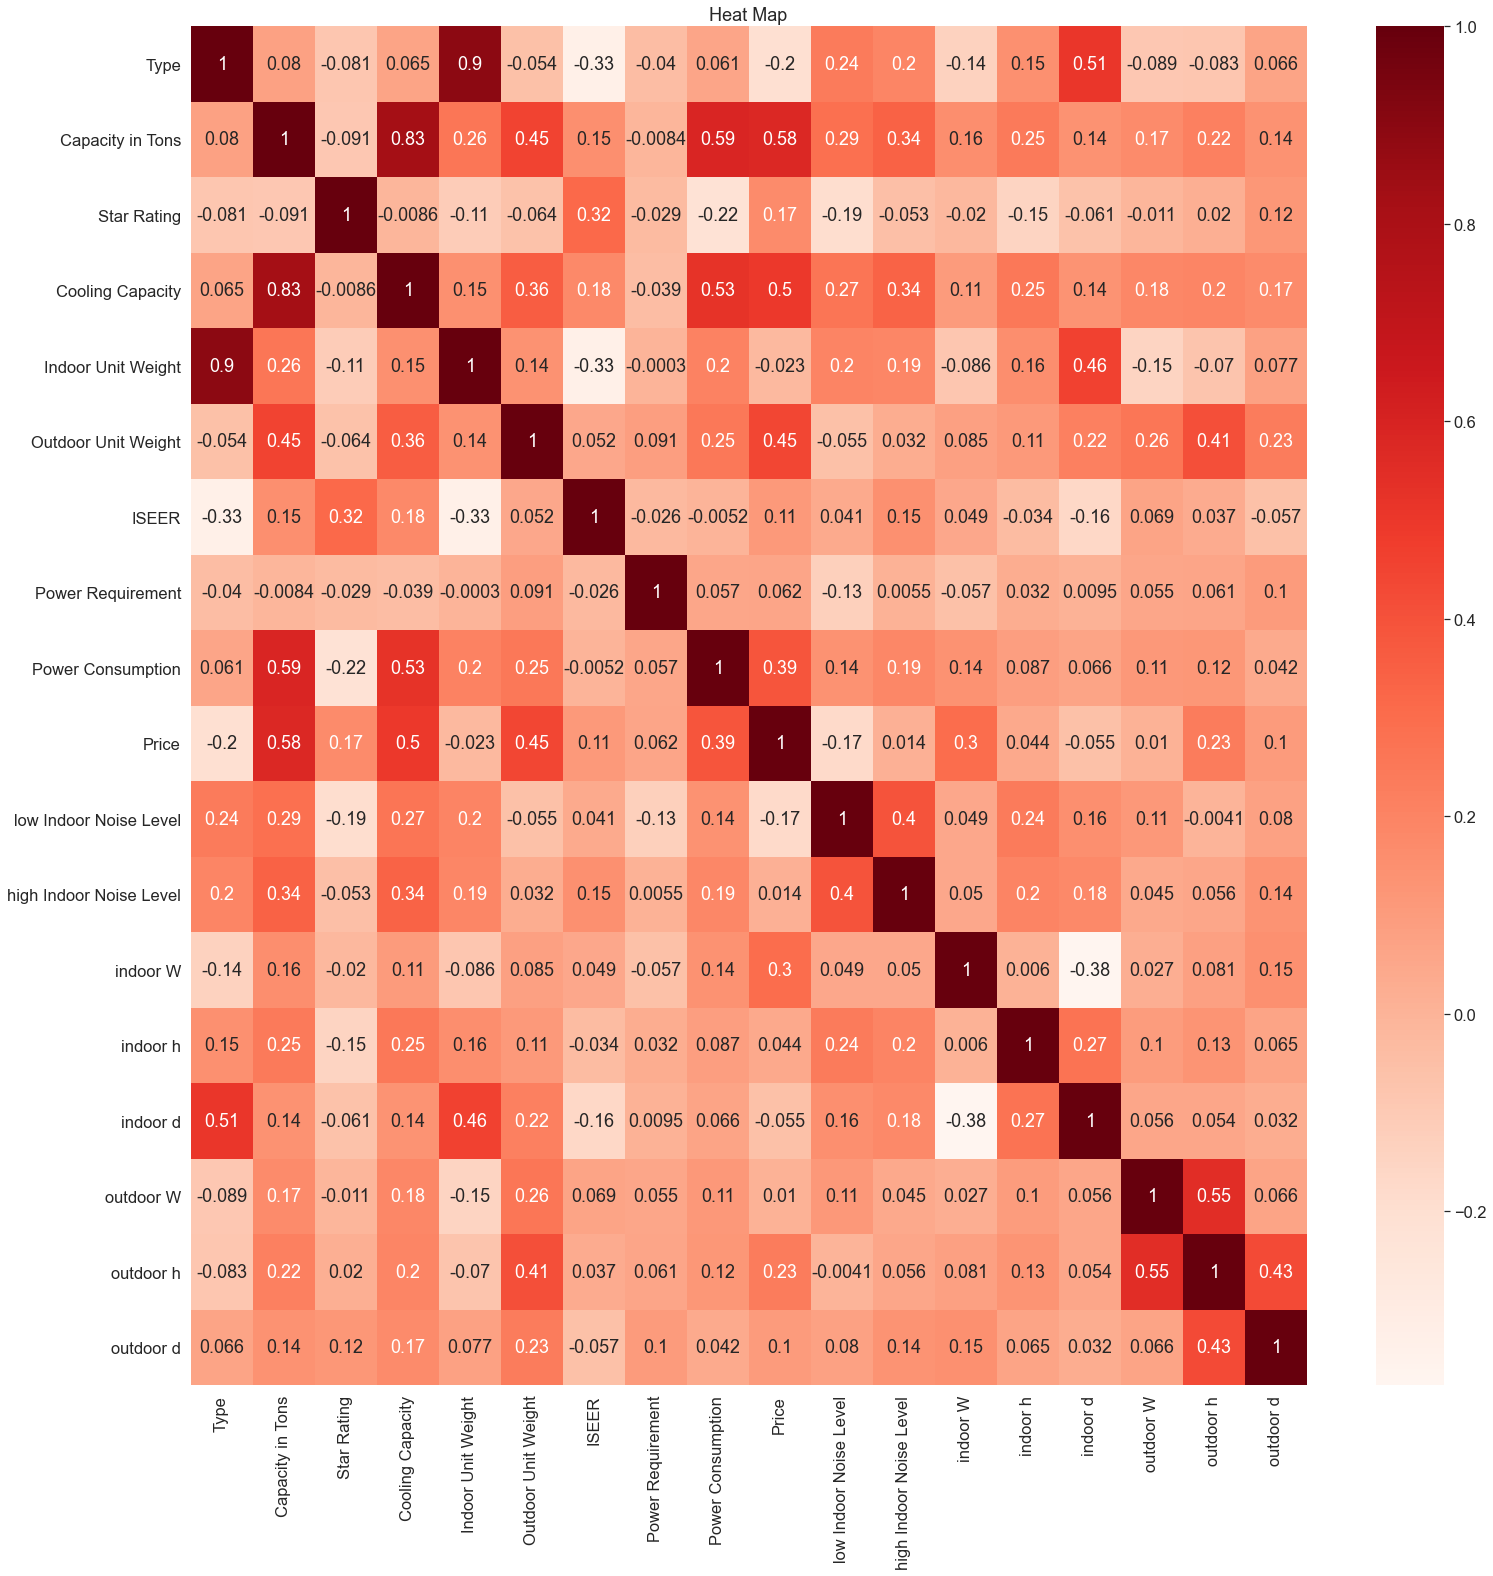

In [7]:
#for font size
sns.set(font_scale=1.5)

#setting style as dark
sns.set_style("dark")

#using .figure(figsize) for size
plt.figure(figsize=(25,25))

sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)

#.title() to give title to the graph
plt.title("Heat Map")

#to show graph
plt.show()

Outdoor w, outdoor h, power consumption , price, capacity in tons, cooling capacity have high muticolinearity but are essential columns, so can not drop the columns.

## Creating Dummies

In [8]:
data = pd.get_dummies(data, columns=['Type','Capacity in Tons'],drop_first=True)

In [9]:
# selecting all object columns in the variable data1
data1 = data.select_dtypes(include = ['object'])
data1.head()

,Brand,Cooling and Heating,Compressor,Dehumidification,Refrigerant,Technology Used,Condenser Coil,Panel Display,Turbo Mode,Evaporator Fin Type,...,Anti-bacteria Filter,Deodorizing Filter,Auto Restart,Timer,Child Lock,Quiet Mode,Sleep Mode,Memory Feature,Self Diagnosis,Emergency Operational Button
0,Blue Star,No,Rotary,Yes,R410A,Precision Cooling Technology,Copper,Yes,No,Hydrophilic Aluminium Fin,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
1,Blue Star,No,Rotary,Yes,R410A,Precision Cooling Technology,Copper,Yes,No,Hydrophilic Aluminium Fin,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
2,Blue Star,No,Rotary,Yes,R32,Precision Cooling Technology,Copper,Yes,No,HYDROPHILIC Golden FINS,...,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Yes
3,Blue Star,No,Rotary,Yes,R32,Precision Cooling Technology,Copper,Yes,Yes,Hydrophilic Aluminium Fin,...,Yes,No,No,Yes,No,No,Yes,Yes,No,Yes
4,Blue Star,No,Rotary,Yes,R32,Precision Cooling Technology,Copper,Yes,Yes,Hydrophilic Aluminium Fin,...,Yes,No,No,Yes,No,No,Yes,Yes,No,Yes


In [10]:
#creating dummies of all object columns with dropping first dummy from each column by drop_first
dummies = pd.get_dummies(data1,drop_first = True)
dummies.head()

,Brand_CARRIER,Brand_Croma,Brand_Daikin,Brand_Godrej,Brand_Haier,Brand_Hisense,Brand_Hitachi,Brand_IFB,Brand_IFFALCON by TCL,Brand_IMPEX,...,Anti-bacteria Filter_Yes,Deodorizing Filter_Yes,Auto Restart_Yes,Timer_Yes,Child Lock_Yes,Quiet Mode_Yes,Sleep Mode_Yes,Memory Feature_Yes,Self Diagnosis_Yes,Emergency Operational Button_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,1


In [11]:
#dropping columns of which we have made dummies
data = data.drop(list(data1.columns),axis=1)

#concatinating the dummy variables
data = pd.concat([data,dummies],axis=1)

#checking the shape
data.shape

(667, 150)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 150 entries, Star Rating to Emergency Operational Button_Yes
dtypes: float64(12), int64(4), uint8(134)
memory usage: 170.8 KB


In [13]:
#impoting packages
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
pd.pandas.set_option('display.max_columns',None)

## Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

#dependent columns
X = data.drop(['Star Rating'], axis=1)

X.head()

,Cooling Capacity,Indoor Unit Weight,Outdoor Unit Weight,ISEER,Power Requirement,Power Consumption,Price,low Indoor Noise Level,high Indoor Noise Level,indoor W,indoor h,indoor d,outdoor W,outdoor h,outdoor d,Type_1,Capacity in Tons_1.0,Capacity in Tons_1.2,Capacity in Tons_1.5,Capacity in Tons_1.6,Capacity in Tons_1.8,Capacity in Tons_2.0,Brand_CARRIER,Brand_Croma,Brand_Daikin,Brand_Godrej,Brand_Haier,Brand_Hisense,Brand_Hitachi,Brand_IFB,Brand_IFFALCON by TCL,Brand_IMPEX,Brand_Intex,Brand_LG,Brand_LIVPURE,Brand_Lloyd,Brand_LumX,Brand_MarQ By Flipkart,Brand_Micromax,Brand_Midea,Brand_O General,Brand_ONIDA,Brand_Panasonic,Brand_SAMSUNG,Brand_Sansui,Brand_TCL,Brand_TOSHIBA,Brand_Voltas,Brand_Whirlpool,Brand_White Westing House,Cooling and Heating_Yes,Compressor_DC Inverter Compressor,Compressor_DC Rotary,Compressor_Digital Inverter Compressor,Compressor_Dual Inverter Compressor,Compressor_Dual Rotary,Compressor_Eco-Tropical Inverter,Compressor_Fixed Speed Compressor,Compressor_High EER Rotary,Compressor_High EER Rotary - BLDC,Compressor_High EER Twin Rotary - BLDC,Compressor_Hyper Tropical Rotary Compressor,Compressor_Inverter,Compressor_Inverter Rotary,Compressor_Neo Swing,Compressor_Neo Swing Compressor,Compressor_Rotary,Compressor_Smart Inverter Compressor,Compressor_Twin Rotary,Compressor_Twin Rotary Inverter,Compressor_Ultra-Inverter Compressor,Dehumidification_Yes,Refrigerant_R290,Refrigerant_R32,"Refrigerant_R410,R32",Refrigerant_R410A,Technology Used_AI Ultra-Inverter Technology,Technology Used_Auto Climate Technology,Technology Used_Coanda Airflow Technology,Technology Used_DC Inverter Technology,Technology Used_Dual Cool,Technology Used_Dual Inverter,Technology Used_Dual Rotary,Technology Used_Dual Rotary Compressor,Technology Used_Eco Tropical Inverter Technology,"Technology Used_Flexicool, Hybridjet, Insta Kool, AI Cool","Technology Used_Follow Me Technology,Turbo Cool mode",Technology Used_Himalaya Cool Technology,Technology Used_Insta Kool,"Technology Used_Insta Kool, AI Cool",Technology Used_Inverter,Technology Used_Inverter Technology,"Technology Used_MPFI Technology, 6th Sense Energy Saver Technology",Technology Used_Precision Cooling Technology,Technology Used_Rotary,Technology Used_Rotary Compressor,Technology Used_Rotary Compressor with BLDC motor,Technology Used_Streamer Discharge Technology,Technology Used_Triple Inverter,Technology Used_Twin Rotary Compressor Technology,Condenser Coil_Aluminium,Condenser Coil_Copper,Panel Display_Hidden Display,Panel Display_Hidden LED Display,Panel Display_LCD with Backlit,Panel Display_LED,Panel Display_LED Digital,Panel Display_LED Magic Display,Panel Display_Magic Display,Panel Display_No,Panel Display_Room Temperature Display,Panel Display_Yes,Turbo Mode_Yes,Evaporator Fin Type_Blue Evaporator Fins,Evaporator Fin Type_Copper,Evaporator Fin Type_Golden Fin,Evaporator Fin Type_HYDROPHILIC Golden FINS,Evaporator Fin Type_Hydrophilic Aluminium Fin,Evaporator Fin Type_Hydrophilic Blue Fins,Evaporator Fin Type_Titan Gold,Condenser Fin Type_Anti Corrosion Gold Fin,Condenser Fin Type_Anti Corrosive Blue Fins,Condenser Fin Type_Bare,Condenser Fin Type_Blue Evaporator Fins,Condenser Fin Type_Blue Fin Condenser,Condenser Fin Type_Blue fin,Condenser Fin Type_COPPER CONDENSER WITH ANTI CORROSIVE BLUE FINS,Condenser Fin Type_Copper,Condenser Fin Type_Golden Fin,Condenser Fin Type_Hydrophilic Blue Fins,Condenser Fin Type_Hydrophobic Aluminium,Condenser Fin Type_Ocean Black Fin,Condenser Fin Type_PFC with Golden Anti Corrosive Coating,Condenser Fin Type_Titan Gold,Stepped Louvers_Yes,Auto Air Swing_Yes,Air Flow Direction_4 Way,Air Flow Direction_Horizontal,Air Flow Direction_Up/Down Swing Flaps,Anti-bacteria Filter_Yes,Deodorizing Filter_Yes,Auto Restart_Yes,Timer_Yes,Child Lock_Yes,Quiet Mode_Yes,Sleep Mode_Yes,Memory Feature_Yes,Self Diagnosis_Yes,Emergency Operational Button_Yes
0,2499.0,35.1,27.8,3.00,230.0,840.0,19990,35,55,60.0,38.0,56.0,72.0,54.8,26.5,1,0,0,0,0,0,0,0,0,0,0,0,

In [15]:
#target column
y = data['Star Rating']

y.head()

0    3
1    3
2    3
3    3
4    3
Name: Star Rating, dtype: int64

In [16]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Scalling The Data

In [17]:
#standard scaller
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')

#num_vars
num_vars = data.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

num_vars.remove('Star Rating')

#scaling in X_train
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head(10)

,Cooling Capacity,Indoor Unit Weight,Outdoor Unit Weight,ISEER,Power Requirement,Power Consumption,Price,low Indoor Noise Level,high Indoor Noise Level,indoor W,indoor h,indoor d,outdoor W,outdoor h,outdoor d,Type_1,Capacity in Tons_1.0,Capacity in Tons_1.2,Capacity in Tons_1.5,Capacity in Tons_1.6,Capacity in Tons_1.8,Capacity in Tons_2.0,Brand_CARRIER,Brand_Croma,Brand_Daikin,Brand_Godrej,Brand_Haier,Brand_Hisense,Brand_Hitachi,Brand_IFB,Brand_IFFALCON by TCL,Brand_IMPEX,Brand_Intex,Brand_LG,Brand_LIVPURE,Brand_Lloyd,Brand_LumX,Brand_MarQ By Flipkart,Brand_Micromax,Brand_Midea,Brand_O General,Brand_ONIDA,Brand_Panasonic,Brand_SAMSUNG,Brand_Sansui,Brand_TCL,Brand_TOSHIBA,Brand_Voltas,Brand_Whirlpool,Brand_White Westing House,Cooling and Heating_Yes,Compressor_DC Inverter Compressor,Compressor_DC Rotary,Compressor_Digital Inverter Compressor,Compressor_Dual Inverter Compressor,Compressor_Dual Rotary,Compressor_Eco-Tropical Inverter,Compressor_Fixed Speed Compressor,Compressor_High EER Rotary,Compressor_High EER Rotary - BLDC,Compressor_High EER Twin Rotary - BLDC,Compressor_Hyper Tropical Rotary Compressor,Compressor_Inverter,Compressor_Inverter Rotary,Compressor_Neo Swing,Compressor_Neo Swing Compressor,Compressor_Rotary,Compressor_Smart Inverter Compressor,Compressor_Twin Rotary,Compressor_Twin Rotary Inverter,Compressor_Ultra-Inverter Compressor,Dehumidification_Yes,Refrigerant_R290,Refrigerant_R32,"Refrigerant_R410,R32",Refrigerant_R410A,Technology Used_AI Ultra-Inverter Technology,Technology Used_Auto Climate Technology,Technology Used_Coanda Airflow Technology,Technology Used_DC Inverter Technology,Technology Used_Dual Cool,Technology Used_Dual Inverter,Technology Used_Dual Rotary,Technology Used_Dual Rotary Compressor,Technology Used_Eco Tropical Inverter Technology,"Technology Used_Flexicool, Hybridjet, Insta Kool, AI Cool","Technology Used_Follow Me Technology,Turbo Cool mode",Technology Used_Himalaya Cool Technology,Technology Used_Insta Kool,"Technology Used_Insta Kool, AI Cool",Technology Used_Inverter,Technology Used_Inverter Technology,"Technology Used_MPFI Technology, 6th Sense Energy Saver Technology",Technology Used_Precision Cooling Technology,Technology Used_Rotary,Technology Used_Rotary Compressor,Technology Used_Rotary Compressor with BLDC motor,Technology Used_Streamer Discharge Technology,Technology Used_Triple Inverter,Technology Used_Twin Rotary Compressor Technology,Condenser Coil_Aluminium,Condenser Coil_Copper,Panel Display_Hidden Display,Panel Display_Hidden LED Display,Panel Display_LCD with Backlit,Panel Display_LED,Panel Display_LED Digital,Panel Display_LED Magic Display,Panel Display_Magic Display,Panel Display_No,Panel Display_Room Temperature Display,Panel Display_Yes,Turbo Mode_Yes,Evaporator Fin Type_Blue Evaporator Fins,Evaporator Fin Type_Copper,Evaporator Fin Type_Golden Fin,Evaporator Fin Type_HYDROPHILIC Golden FINS,Evaporator Fin Type_Hydrophilic Aluminium Fin,Evaporator Fin Type_Hydrophilic Blue Fins,Evaporator Fin Type_Titan Gold,Condenser Fin Type_Anti Corrosion Gold Fin,Condenser Fin Type_Anti Corrosive Blue Fins,Condenser Fin Type_Bare,Condenser Fin Type_Blue Evaporator Fins,Condenser Fin Type_Blue Fin Condenser,Condenser Fin Type_Blue fin,Condenser Fin Type_COPPER CONDENSER WITH ANTI CORROSIVE BLUE FINS,Condenser Fin Type_Copper,Condenser Fin Type_Golden Fin,Condenser Fin Type_Hydrophilic Blue Fins,Condenser Fin Type_Hydrophobic Aluminium,Condenser Fin Type_Ocean Black Fin,Condenser Fin Type_PFC with Golden Anti Corrosive Coating,Condenser Fin Type_Titan Gold,Stepped Louvers_Yes,Auto Air Swing_Yes,Air Flow Direction_4 Way,Air Flow Direction_Horizontal,Air Flow Direction_Up/Down Swing Flaps,Anti-bacteria Filter_Yes,Deodorizing Filter_Yes,Auto Restart_Yes,Timer_Yes,Child Lock_Yes,Quiet Mode_Yes,Sleep Mode_Yes,Memory Feature_Yes,Self Diagnosis_Yes,Emergency Operational Button_Yes
100,-0.915310,3.123954,-3.366999,-0.672900,0.172577,-0.378732,-0.814031,0.010902,0.658731,-0.160792,-0

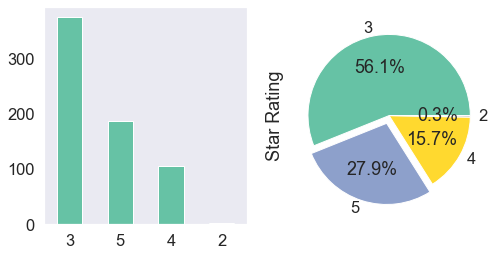

In [18]:
#For Target Variable
plt.rcParams['figure.figsize'] = 8,4
fig,ax = plt.subplots(1,2)
data['Star Rating'].value_counts().plot(kind='bar',rot=0,ax=ax[0],cmap='Set2')
data['Star Rating'].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1],cmap='Set2',explode=[0,0.1,0,0])
plt.show()

## Logestic Regression

In [19]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Star Rating   No. Observations:                  533
Model:                            GLM   Df Residuals:                      400
Model Family:                Binomial   Df Model:                          132
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Mon, 04 Oct 2021   Deviance:                   1.0923e+05
Time:                        11:29:53   Pearson chi2:                 1.94e+19
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                               3.338e+15   1.83e+08   1.82e+07      0.000    3.34e+15    3.34e+15
Cooling Capacity                                                    6.192e+14   1.15e+07   5.38e+07      0.000    6.19e+14    6.19e+14
Indoor Unit Weight                                                  7.105e+14   3.42e+07   2.08e+07      0.000    7.11e+14    7.11e+14
Outdoor Unit Weight                                                -3.863e+14   1.04e+07   -3.7e+07      0.000   -3.86e+14   -3.86e+14
ISEER                                                               2.742e+15   7.92e+06   3.46e+08      0.000    2.74e+15    2.74e+15
Power Requirement                                                  -5.842e+14   9.64e+06  -6.06e+07      0.000   -5.84e+14   -5.84e+14
Power Consumption                                                   2.761e+14   8.67e+06   3.18e+07      0.000    2.76e+14    2.76e+14
Price                                                               3.994e+15   1.47e+07   2.72e+08      0.000    3.99e+15    3.99e+15
low Indoor Noise Level                                             -7.753e+14   9.33e+06  -8.31e+07      0.000   -7.75e+14   -7.75e+14
high Indoor Noise Level                                             1.478e+13    9.7e+06   1.52e+06      0.000    1.48e+13    1.48e+13
indoor W                                                            2.857e+14   9.49e+06   3.01e+07      0.000    2.86e+14    2.86e+14
indoor h                                                           -2.172e+13   5.21e+06  -4.17e+06      0.000   -2.17e+13   -2.17e+13
indoor d                                                            2.261e+14   6.48e+06   3.49e+07      0.000    2.26e+14    2.26e+14
outdoor W                                                           2.954e+13   9.37e+06   3.15e+06      0.000    2.95e+13    2.95e+13
outdoor h                                                           2.999e+13   9.76e+06   3.07e+06      0.000       3e+13       3e+13
outdoor d                                                           1.304e+14    5.8e+06   2.25e+07      0.000     1.3e+14     1.3e+14
Type_1                                                              4.267e+15   1.01e+08    4.2e+07      0.000    4.27e+15    4.27e+15
Capacity in Tons_1.0                                               -4.738e+15   6.16e+07  -7.69e+07      0.000   -4.74e+15   -4.74e+15
Capacity in Tons_1.2                                                -8.65e+15   1.44e+08  -6.02e+07      0.000   -8.65e+15   -8.65e+15
Capacity in Tons_1.5                                               -1.028e+16   6.77e+07  -1.52e+08      0.000   

## RFE

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 100)             
rfe = rfe.fit(X_train, y_train)

In [21]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Cooling Capacity', False, 11),
 ('Indoor Unit Weight', True, 1),
 ('Outdoor Unit Weight', True, 1),
 ('ISEER', True, 1),
 ('Power Requirement', True, 1),
 ('Power Consumption', True, 1),
 ('Price', True, 1),
 ('low Indoor Noise Level', True, 1),
 ('high Indoor Noise Level', True, 1),
 ('indoor W', True, 1),
 ('indoor h', False, 6),
 ('indoor d', True, 1),
 ('outdoor W', True, 1),
 ('outdoor h', True, 1),
 ('outdoor d', True, 1),
 ('Type_1', True, 1),
 ('Capacity in Tons_1.0', True, 1),
 ('Capacity in Tons_1.2', False, 7),
 ('Capacity in Tons_1.5', True, 1),
 ('Capacity in Tons_1.6', False, 31),
 ('Capacity in Tons_1.8', True, 1),
 ('Capacity in Tons_2.0', True, 1),
 ('Brand_CARRIER', False, 3),
 ('Brand_Croma', False, 21),
 ('Brand_Daikin', True, 1),
 ('Brand_Godrej', True, 1),
 ('Brand_Haier', True, 1),
 ('Brand_Hisense', False, 46),
 ('Brand_Hitachi', True, 1),
 ('Brand_IFB', True, 1),
 ('Brand_IFFALCON by TCL', True, 1),
 ('Brand_IMPEX', False, 49),
 ('Brand_Intex', True, 1),
 ('

In [22]:
col = X_train.columns[rfe.support_]
col

Index(['Indoor Unit Weight', 'Outdoor Unit Weight', 'ISEER',
       'Power Requirement', 'Power Consumption', 'Price',
       'low Indoor Noise Level', 'high Indoor Noise Level', 'indoor W',
       'indoor d', 'outdoor W', 'outdoor h', 'outdoor d', 'Type_1',
       'Capacity in Tons_1.0', 'Capacity in Tons_1.5', 'Capacity in Tons_1.8',
       'Capacity in Tons_2.0', 'Brand_Daikin', 'Brand_Godrej', 'Brand_Haier',
       'Brand_Hitachi', 'Brand_IFB', 'Brand_IFFALCON by TCL', 'Brand_Intex',
       'Brand_LG', 'Brand_LIVPURE', 'Brand_Lloyd', 'Brand_LumX',
       'Brand_MarQ By Flipkart', 'Brand_Midea', 'Brand_O General',
       'Brand_Panasonic', 'Brand_SAMSUNG', 'Brand_TOSHIBA', 'Brand_Voltas',
       'Brand_Whirlpool', 'Cooling and Heating_Yes',
       'Compressor_Digital Inverter Compressor', 'Compressor_Dual Rotary',
       'Compressor_Fixed Speed Compressor', 'Compressor_High EER Rotary',
       'Compressor_High EER Rotary - BLDC', 'Compressor_Inverter',
       'Compressor_Inverter Ro

## Checking Result

In [23]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Star Rating   No. Observations:                  533
Model:                            GLM   Df Residuals:                      435
Model Family:                Binomial   Df Model:                           97
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Mon, 04 Oct 2021   Deviance:                   1.0923e+05
Time:                        11:29:57   Pearson chi2:                 1.94e+19
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                                9.16e+15   1.11e+08   8.25e+07      0.000    9.16e+15    9.16e+15
Indoor Unit Weight                                                  2.025e+15    1.8e+07   1.12e+08      0.000    2.03e+15    2.03e+15
Outdoor Unit Weight                                                -8.929e+13   6.77e+06  -1.32e+07      0.000   -8.93e+13   -8.93e+13
ISEER                                                               1.888e+15   5.58e+06   3.38e+08      0.000    1.89e+15    1.89e+15
Power Requirement                                                  -7.261e+14   6.69e+06  -1.08e+08      0.000   -7.26e+14   -7.26e+14
Power Consumption                                                  -9.991e+13   6.96e+06  -1.44e+07      0.000   -9.99e+13   -9.99e+13
Price                                                               4.782e+15   1.01e+07   4.72e+08      0.000    4.78e+15    4.78e+15
low Indoor Noise Level                                             -1.087e+15   6.85e+06  -1.59e+08      0.000   -1.09e+15   -1.09e+15
high Indoor Noise Level                                            -9.396e+12   7.91e+06  -1.19e+06      0.000    -9.4e+12    -9.4e+12
indoor W                                                           -1.438e+14   7.97e+06   -1.8e+07      0.000   -1.44e+14   -1.44e+14
indoor d                                                            1.275e+13   6.02e+06   2.12e+06      0.000    1.27e+13    1.27e+13
outdoor W                                                           9.591e+13   6.89e+06   1.39e+07      0.000    9.59e+13    9.59e+13
outdoor h                                                           2.061e+14   6.75e+06   3.05e+07      0.000    2.06e+14    2.06e+14
outdoor d                                                           7.998e+13   4.82e+06   1.66e+07      0.000       8e+13       8e+13
Type_1                                                              1.992e+15   5.29e+07   3.77e+07      0.000    1.99e+15    1.99e+15
Capacity in Tons_1.0                                               -2.892e+14   3.04e+07  -9.51e+06      0.000   -2.89e+14   -2.89e+14
Capacity in Tons_1.5                                               -4.446e+15   3.32e+07  -1.34e+08      0.000   -4.45e+15   -4.45e+15
Capacity in Tons_1.8                                               -1.041e+16   5.57e+07  -1.87e+08      0.000   -1.04e+16   -1.04e+16
Capacity in Tons_2.0                                               -1.347e+16   4.48e+07     -3e+08      0.000   -1.35e+16   -1.35e+16
Brand_Daikin                                                       -9.041e+15   5.01e+07   -1.8e+08      0.000   

In [24]:
#probability prediction for y column
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

100    1.0
156    1.0
58     1.0
430    1.0
493    1.0
319    1.0
72     1.0
315    1.0
198    1.0
200    1.0
dtype: float64

As we can see that the p value is 0 at every column and the probability given at each prediction is same, so our logestic regression assumption is failing because of multicolinerity in data and logestic regression is not able to provide good results, hence we apply decision tree.

## Decision Tree Classification

In [25]:
#scaling X_test
num_vars = data.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

num_vars.remove('Star Rating')

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [26]:
#importing packages of decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

#base models for ginni and entropy
dt_gini = DecisionTreeClassifier(criterion = "gini",random_state = 42,max_depth=2)
dt_en = DecisionTreeClassifier(criterion = "entropy",random_state = 42)

In [27]:
#fitting model
dt_gini.fit(X_train, y_train)
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
#predicting
y_pred = dt_gini.predict(X_test)
y_pred1 = dt_en.predict(X_test)

## Evaluation Of Base Model Decision Tree

In [29]:
#report for gini
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           3       0.92      0.86      0.89        71
           4       0.88      0.26      0.40        27
           5       0.53      0.89      0.67        36

    accuracy                           0.75       134
   macro avg       0.78      0.67      0.65       134
weighted avg       0.81      0.75      0.73       134



In [30]:
#report for entropy
print("Classification report - \n", classification_report(y_test,y_pred1))

Classification report - 
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       1.00      0.94      0.97        71
           4       0.96      1.00      0.98        27
           5       0.95      1.00      0.97        36

    accuracy                           0.97       134
   macro avg       0.73      0.74      0.73       134
weighted avg       0.98      0.97      0.97       134



As you can see the accuracy is low in the base model of gini and their is overfitting in base model of entropy we use Post Pruning in Decision Tree To find accurate results.

## Post Pruning Decision Tree

In [31]:
from sklearn.metrics import roc_auc_score
# Allow a decision tree to grow to its full depth
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [r2_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [r2_score(y_test, clf.predict(X_test)) for clf in clfs]

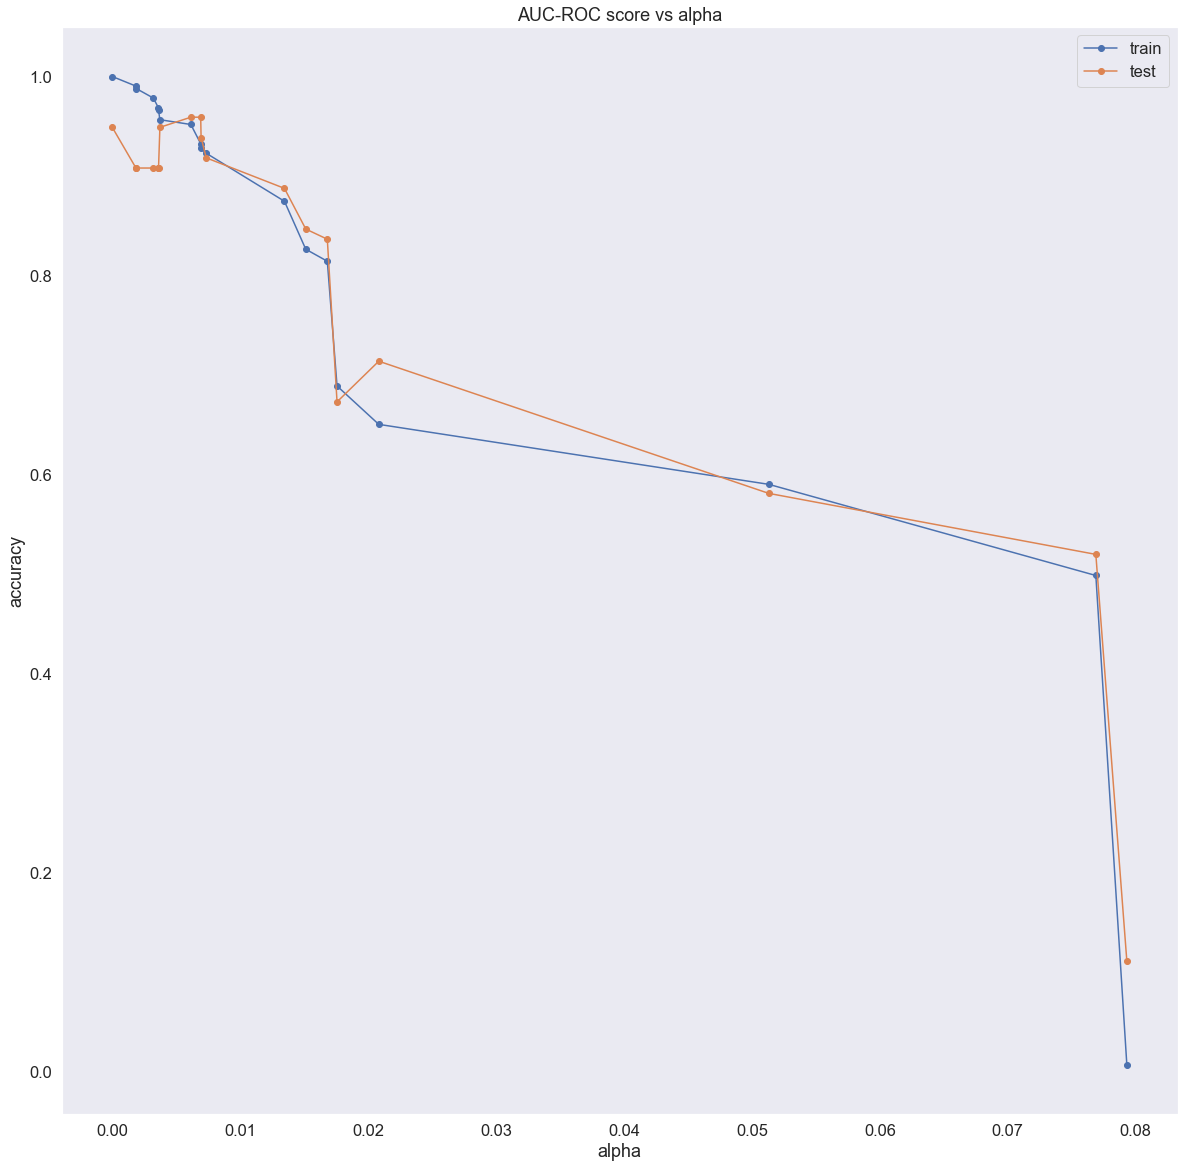

<Figure size 1440x1440 with 0 Axes>

In [32]:
#plotting train and test accuracy
fig, ax = plt.subplots(figsize = (20,20))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.figure(figsize = (20,20))
plt.show()

In [33]:
#applying value of alpha after finding from plot
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

#fitting model
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=42)

In [34]:
#predicting values
pred=clf.predict(X_test)

#test score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9328358208955224

In [35]:
#train score
clf.score(X_train,y_train)

0.949343339587242

## Evaluating Decision Tree Outputs

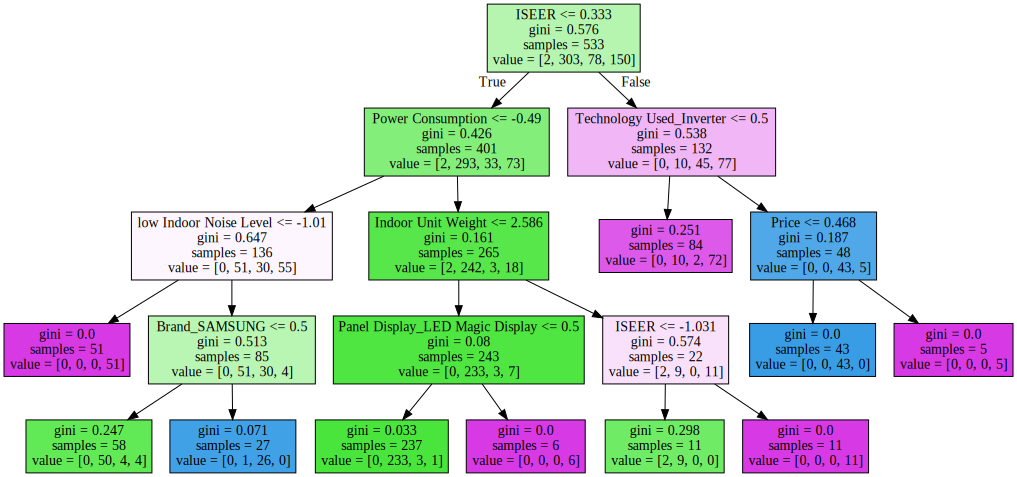

In [36]:
import graphviz
from sklearn import tree
import pylab
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 


graph

In [37]:
#creating result dataframe of decision tree
y_pred_final = pd.DataFrame({'Star Rating':y_test.values, 'Prediction':pred})
y_pred_final['CustID'] = y_test.index
y_pred_final

,Star Rating,Prediction,CustID
0,4,4,500
1,3,3,540
2,5,5,633
3,5,5,227
4,5,5,103
...,...,...,...
129,3,3,9
130,3,3,365
131,3,3,75
132,4,3,216


In [38]:
#classification report
print("Classification report - \n", classification_report(y_test,pred))

Classification report - 
               precision    recall  f1-score   support

           3       0.93      0.97      0.95        71
           4       1.00      0.74      0.85        27
           5       0.90      1.00      0.95        36

    accuracy                           0.93       134
   macro avg       0.94      0.90      0.92       134
weighted avg       0.94      0.93      0.93       134



In [39]:
#saving Decision Tree Results
y_pred_final.to_excel("Decision_Tree_Classification_Prediction.xlsx")

## Important Columns Given By Decision Tree

In [40]:
#important columns dataframe
importance = pd.DataFrame({'Features':X_test.columns, 'Importance':clf.feature_importances_})

In [41]:
#displaying all columns
pd.pandas.set_option('display.max_rows',None)
importance

,Features,Importance
0,Cooling Capacity,0.000000
1,Indoor Unit Weight,0.041549
2,Outdoor Unit Weight,0.000000
3,ISEER,0.288422
4,Power Requirement,0.000000
5,Power Consumption,0.155243
6,Price,0.034637
7,low Indoor Noise Level,0.171638
8,high Indoor Noise Level,0.000000
9,indoor W,0.000000


In [42]:
#sorting
importance.sort_values(by = "Importance",ascending = False)

,Features,Importance
3,ISEER,0.288422
7,low Indoor Noise Level,0.171638
90,Technology Used_Inverter,0.158444
5,Power Consumption,0.155243
43,Brand_SAMSUNG,0.105759
107,Panel Display_LED Magic Display,0.044308
1,Indoor Unit Weight,0.041549
6,Price,0.034637
103,Panel Display_Hidden LED Display,0.000000
98,Technology Used_Triple Inverter,0.000000


In [43]:
#confusion matrix
confusion = metrics.confusion_matrix(y_test, pred )
confusion

array([[69,  0,  2],
       [ 5, 20,  2],
       [ 0,  0, 36]], dtype=int64)

In [44]:
#test-train accuracy
print ('Train Accuracy :',clf.score(X_train,y_train))
print ('Test Accuracy :',clf.score(X_test,y_test))

Train Accuracy : 0.949343339587242
Test Accuracy : 0.9328358208955224


As we see the model has consider less important columns we switch to Boosting Technique(Xgboost) to take more column into consideration.

## XGBoost Classification

In [45]:
#base model
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

[11:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
#default par.
xgboost.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [47]:
#classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, preds, ))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       1.00      0.99      0.99        71
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        36

    accuracy                           0.99       134
   macro avg       0.75      0.75      0.75       134
weighted avg       1.00      0.99      1.00       134



As the Model is overfitting we will change the parameters and tune them to give better results.

## HyperParameter Tuning XGBoost

In [48]:
#tuned model
xgboost = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=25, gamma=10, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

#fitting model
xgboost.fit(X_train, y_train)

#predicting
preds = xgboost.predict(X_test)

[11:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
#classification report
print(classification_report(y_test, preds, ))

              precision    recall  f1-score   support

           3       0.95      0.99      0.97        71
           4       1.00      0.78      0.88        27
           5       0.92      1.00      0.96        36

    accuracy                           0.95       134
   macro avg       0.96      0.92      0.93       134
weighted avg       0.95      0.95      0.95       134



In [50]:
#test-train accuracy
print ('Train Accuracy :',xgboost.score(X_train,y_train))
print ('Test Accuracy :',xgboost.score(X_test,y_test))

Train Accuracy : 0.9305816135084428
Test Accuracy : 0.9477611940298507


In [51]:
#important features
importance_xg = pd.DataFrame({'Features':X_test.columns, 'Importance':xgboost.feature_importances_})

In [52]:
importance_xg

,Features,Importance
0,Cooling Capacity,0.043509
1,Indoor Unit Weight,0.046371
2,Outdoor Unit Weight,0.047041
3,ISEER,0.079797
4,Power Requirement,0.000000
5,Power Consumption,0.051273
6,Price,0.055101
7,low Indoor Noise Level,0.000000
8,high Indoor Noise Level,0.000000
9,indoor W,0.063223


In [53]:
importance_xg.sort_values(by = "Importance",ascending = False)

,Features,Importance
36,Brand_LumX,0.091881
3,ISEER,0.079797
73,Refrigerant_R32,0.067371
53,Compressor_Digital Inverter Compressor,0.064529
9,indoor W,0.063223
62,Compressor_Inverter,0.059976
6,Price,0.055101
47,Brand_Voltas,0.055031
5,Power Consumption,0.051273
2,Outdoor Unit Weight,0.047041


As the No. of column taken into consideration are more and they are important column, so we come to conclusion that these are the final predictions.

## Evaluating Result

In [54]:
y_final = pd.DataFrame({'Star Rating':y_test.values, 'Prediction':preds})
y_final['CustID'] = y_test.index
y_final

,Star Rating,Prediction,CustID
0,4,4,500
1,3,3,540
2,5,5,633
3,5,5,227
4,5,5,103
5,3,3,453
6,3,3,97
7,3,3,558
8,5,5,342
9,3,3,546


In [55]:
#confusion matrix
confusion = metrics.confusion_matrix(y_test, preds )
confusion

array([[70,  0,  1],
       [ 4, 21,  2],
       [ 0,  0, 36]], dtype=int64)

In [56]:
#saving XGBoost Results
y_final.to_excel("Final_Classification_Prediction.xlsx")